In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore

In [2]:
# Load your dataset
file_path = 'Node 22C jan 2024 (26 days).csv'
df = pd.read_csv(file_path)
df


,Date Time,Slave_Device1_CH1_FLOW m3/h,Slave_Device1_CH2_VELOCITY m/s,Slave_Device1_CH3_Pressure BAR,Slave_Device1_CH4_Voltage V
0,01/01/24 00:00,44.75,0.30,1.37,12.3
1,01/01/24 00:00,0.00,0.00,0.00,0.0
2,01/01/24 00:00,47.00,0.32,1.37,12.3
3,01/01/24 00:01,46.50,0.31,1.38,12.3
4,01/01/24 00:01,45.50,0.31,1.38,12.3
...,...,...,...,...,...
234286,26/01/24 15:37,87.00,0.58,1.31,13.6
234287,26/01/24 15:37,86.50,0.58,1.31,13.6
234288,26/01/24 15:37,83.00,0.56,1.30,13.6
234289,26/01/24 15:37,82.00,0.55,1.30,13.6


In [3]:
df.rename(columns={'Slave_Device1_CH1_FLOW m3/h' : 'FLOW(m3/h)', 'Slave_Device1_CH2_VELOCITY m/s': 'VELOCITY(m/s)', 'Slave_Device1_CH3_Pressure BAR': 'Pressure'}, inplace=True)
df.drop('Slave_Device1_CH4_Voltage V', axis=1, inplace=True)
df

,Date Time,FLOW(m3/h),VELOCITY(m/s),Pressure
0,01/01/24 00:00,44.75,0.30,1.37
1,01/01/24 00:00,0.00,0.00,0.00
2,01/01/24 00:00,47.00,0.32,1.37
3,01/01/24 00:01,46.50,0.31,1.38
4,01/01/24 00:01,45.50,0.31,1.38
...,...,...,...,...
234286,26/01/24 15:37,87.00,0.58,1.31
234287,26/01/24 15:37,86.50,0.58,1.31
234288,26/01/24 15:37,83.00,0.56,1.30
234289,26/01/24 15:37,82.00,0.55,1.30


In [4]:
df = df.dropna()

In [5]:
# Check for missing values
print("Missing values:\n", df.isna().sum())

# Check for zero values in Flow, Pressure, and Velocity
print("Zero values in Flow:\n", (df['FLOW(m3/h)'] == 0).sum())
print("Zero values in Pressure:\n", (df['Pressure'] == 0).sum())
print("Zero values in Velocity:\n", (df['VELOCITY(m/s)'] == 0).sum())


Missing values:
 Date Time        0
FLOW(m3/h)       0
VELOCITY(m/s)    0
Pressure         0
dtype: int64
Zero values in Flow:
 2801
Zero values in Pressure:
 5166
Zero values in Velocity:
 3125


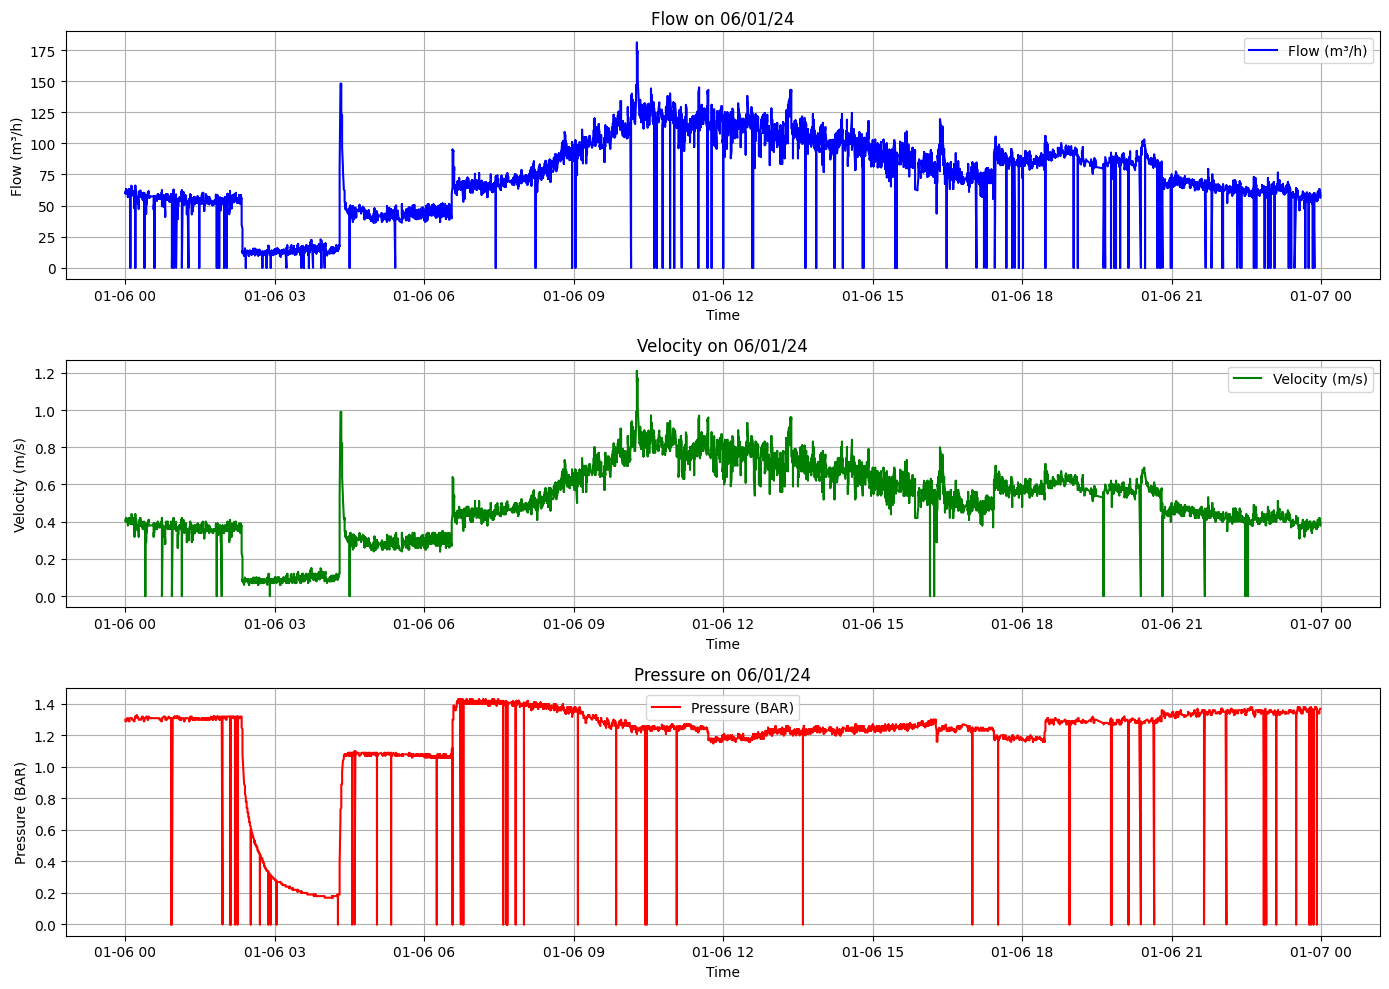

In [6]:
# Load the preprocessed data
# df = pd.read_csv('preprocessed_data_corrected.csv')

# Convert 'Date Time' to datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d/%m/%y %H:%M')

# Choose a specific date to plot
selected_date = '06/01/24'  # Change this to your desired date
df_selected_day = df[df['Date Time'].dt.strftime('%d/%m/%y') == selected_date]

# Plotting
plt.figure(figsize=(14, 10))

# Plot Flow
plt.subplot(3, 1, 1)
plt.plot(df_selected_day['Date Time'], df_selected_day['FLOW(m3/h)'], label='Flow (m³/h)', color='blue')
plt.xlabel('Time')
plt.ylabel('Flow (m³/h)')
plt.title(f'Flow on {selected_date}')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df_selected_day['Date Time'], df_selected_day['VELOCITY(m/s)'], label='Velocity (m/s)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title(f'Velocity on {selected_date}')
plt.grid(True)
plt.legend()

# Plot Pressure
plt.subplot(3, 1, 3)
plt.plot(df_selected_day['Date Time'], df_selected_day['Pressure'], label='Pressure (BAR)', color='red')
plt.xlabel('Time')
plt.ylabel('Pressure (BAR)')
plt.title(f'Pressure on {selected_date}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Remove rows where Flow, Pressure, and Velocity are all zero
import datetime as dt
# df = df[(df['FLOW(m3/h)'] >= 0) & (df['Pressure'] >= 0) & (df['VELOCITY(m/s)'] >= 0)]
df['Date Time'] = pd.to_datetime(df['Date Time']).dt.strftime('%d/%m/%y %H:%M')
df



,Date Time,FLOW(m3/h),VELOCITY(m/s),Pressure
0,01/01/24 00:00,44.75,0.30,1.37
1,01/01/24 00:00,0.00,0.00,0.00
2,01/01/24 00:00,47.00,0.32,1.37
3,01/01/24 00:01,46.50,0.31,1.38
4,01/01/24 00:01,45.50,0.31,1.38
...,...,...,...,...
234286,26/01/24 15:37,87.00,0.58,1.31
234287,26/01/24 15:37,86.50,0.58,1.31
234288,26/01/24 15:37,83.00,0.56,1.30
234289,26/01/24 15:37,82.00,0.55,1.30


In [9]:
# Convert necessary columns to numeric types
df['FLOW(m3/h)'] = pd.to_numeric(df['FLOW(m3/h)'], errors='coerce')
df['Pressure'] = pd.to_numeric(df['Pressure'], errors='coerce')
df['VELOCITY(m/s)'] = pd.to_numeric(df['VELOCITY(m/s)'], errors='coerce')

# Interpolate missing values in the Flow, Pressure, and Velocity columns
df.interpolate(method='linear', inplace=True)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_2076\4236774808.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


,Date Time,FLOW(m3/h),VELOCITY(m/s),Pressure
0,01/01/24 00:00,44.75,0.30,1.37
1,01/01/24 00:00,0.00,0.00,0.00
2,01/01/24 00:00,47.00,0.32,1.37
3,01/01/24 00:01,46.50,0.31,1.38
4,01/01/24 00:01,45.50,0.31,1.38
...,...,...,...,...
234286,26/01/24 15:37,87.00,0.58,1.31
234287,26/01/24 15:37,86.50,0.58,1.31
234288,26/01/24 15:37,83.00,0.56,1.30
234289,26/01/24 15:37,82.00,0.55,1.30


In [10]:
# Create 'No_Water_Supply' column where Pressure or Flow is zero
df['No_Water_Supply'] = df.apply(lambda row: 1 if row['Pressure'] == 0 or row['FLOW(m3/h)'] == 0 else 0, axis=1)
df

,Date Time,FLOW(m3/h),VELOCITY(m/s),Pressure,No_Water_Supply
0,01/01/24 00:00,44.75,0.30,1.37,0
1,01/01/24 00:00,0.00,0.00,0.00,1
2,01/01/24 00:00,47.00,0.32,1.37,0
3,01/01/24 00:01,46.50,0.31,1.38,0
4,01/01/24 00:01,45.50,0.31,1.38,0
...,...,...,...,...,...
234286,26/01/24 15:37,87.00,0.58,1.31,0
234287,26/01/24 15:37,86.50,0.58,1.31,0
234288,26/01/24 15:37,83.00,0.56,1.30,0
234289,26/01/24 15:37,82.00,0.55,1.30,0


In [11]:
# Create 'Pressure_Drop' as the difference between consecutive pressure readings
df['Pressure_Drop'] = df['Pressure'].diff().fillna(0)

# Create 'Flow_Change' as the difference between consecutive flow readings
df['Flow_Change'] = df['FLOW(m3/h)'].diff().fillna(0)
df.to_csv('Preprocessed_data_corrected.csv', index=False)

# Data Visualization

In [12]:
# Convert 'Date Time' to datetime type
# Convert 'Date Time' to datetime format with two-digit year
# df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d/%m/%y %H:%M')


# Plot Flow, Pressure, and Velocity
plt.figure(figsize=(12, 6))
plt.plot(df['Date Time'], df['FLOW(m3/h)'], label='Flow (m³/h)')
plt.plot(df['Date Time'], df['Pressure'], label='Pressure (BAR)')
plt.plot(df['Date Time'], df['VELOCITY(m/s)'], label='Velocity (m/s)')
plt.xlabel('Date Time')
plt.ylabel('Values')
plt.title('Flow, Pressure, and Velocity Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.style as mplstyle #type: ignore

# # Use the 'fast' style for faster plotting
# mplstyle.use('fast')
# df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d/%m/%y %H:%M')

# Plot the data
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.plot(df['Date Time'], df['Pressure'], linestyle='-', marker='.', markersize=1)
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Pressure throughout whole data')

plt.legend()

# Plot the data
plt.subplot(3, 1, 2)
plt.plot(df_cleaned['Date Time'], df_cleaned['VELOCITY(m/s)'], linestyle='-', marker='.', markersize=1)
plt.xlabel('Date')
plt.ylabel('Velocity')
plt.title('Velocity throghout whole data')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_cleaned['Date Time'], df_cleaned['FLOW(m3/h)'], linestyle='-', marker='.', markersize=1)
plt.xlabel('Date')
plt.ylabel('Flow')
plt.title('Flow throughout whole data')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned = df[
    ~((df['Slave_Device1_CH1_FLOW m3/h'] == 0) &
    (df['Slave_Device1_CH2_VELOCITY m/s'] == 0) &
    (df['Slave_Device1_CH3_Pressure BAR'] == 0) &
    (df['Slave_Device1_CH4_Voltage V']))
]

# Remove rows with negative values in any of the relevant columns
df_cleaned = df_cleaned[
    (df_cleaned['Slave_Device1_CH1_FLOW m3/h'] >= 0) &
    (df_cleaned['Slave_Device1_CH2_VELOCITY m/s'] >= 0) &
    (df_cleaned['Slave_Device1_CH3_Pressure BAR'] >= 0)
]

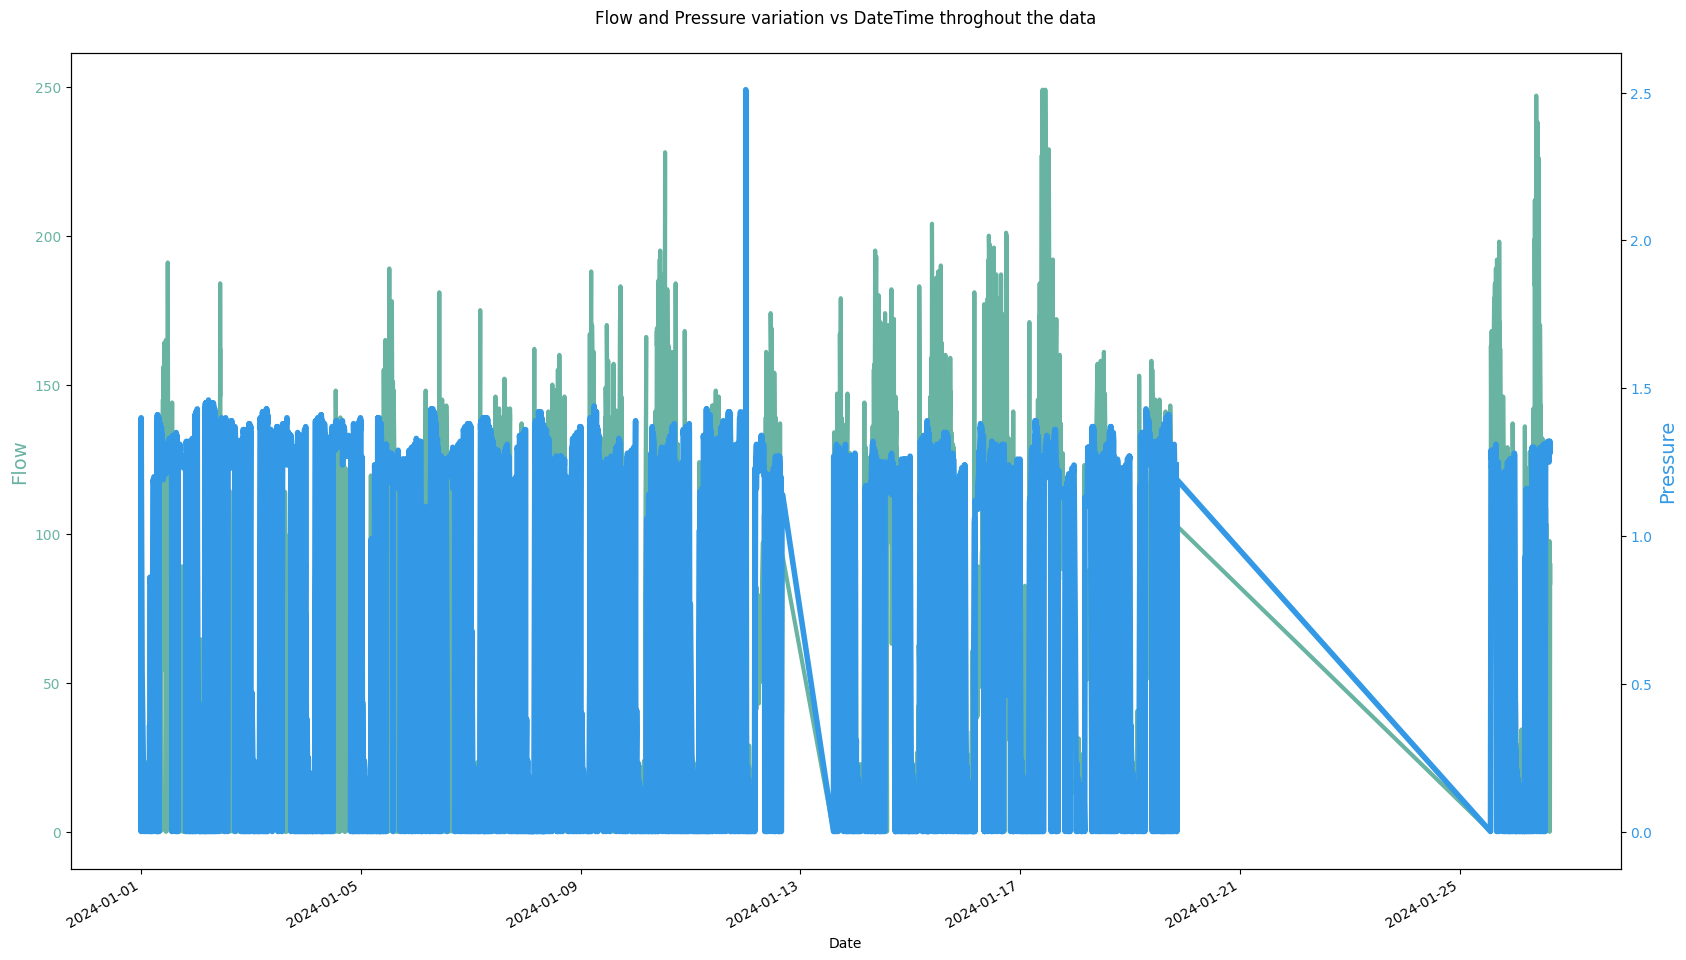

In [23]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(20, 12))
ax2 = ax1.twinx()

ax1.plot(df_cleaned['Date Time'],df_cleaned['FLOW(m3/h)'], color=COLOR_TEMPERATURE, lw=3)
ax2.plot(df_cleaned['Date Time'],df_cleaned['Pressure'], color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Flow", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Pressure", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.autofmt_xdate()

plt.title('Flow and Pressure variation vs DateTime throghout the data\n')
plt.show()

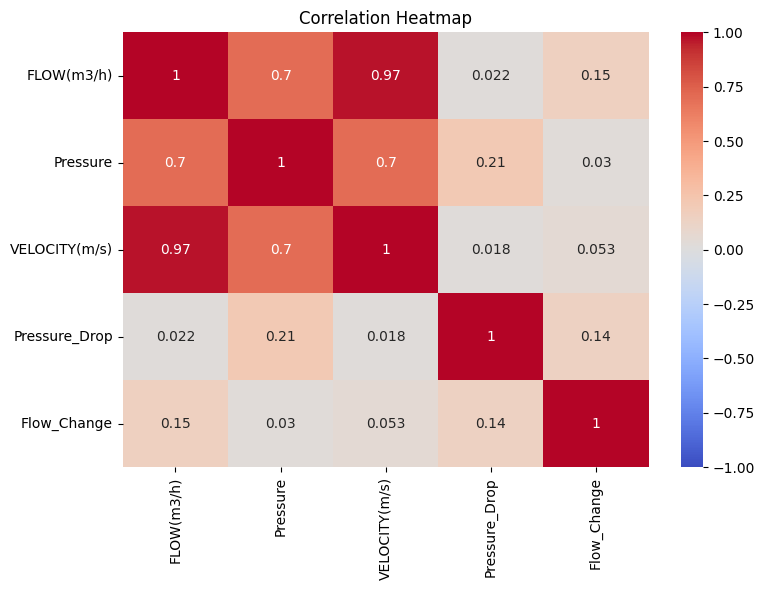

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['FLOW(m3/h)', 'Pressure', 'VELOCITY(m/s)', 'Pressure_Drop', 'Flow_Change']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [25]:
# Display summary statistics for the dataset
df.describe()

,Date Time,FLOW(m3/h),VELOCITY(m/s),Pressure,No_Water_Supply,Pressure_Drop,Flow_Change
count,234269,234269.000000,234269.000000,234269.000000,234269.000000,2.342690e+05,234269.000000
mean,2024-01-11 09:26:13.288569600,72.574621,0.486809,1.008867,0.030273,-2.988018e-07,0.000165
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,-1.930000e+00,-236.000000
25%,2024-01-05 17:56:00,46.000000,0.310000,0.990000,0.000000,0.000000e+00,-1.430000
50%,2024-01-11 03:02:00,74.500000,0.500000,1.240000,0.000000,0.000000e+00,0.000000
75%,2024-01-16 03:10:00,102.000000,0.680000,1.300000,0.000000,0.000000e+00,1.000000
max,2024-01-26 15:37:00,249.000000,2.510000,2.510000,1.000000,1.920000e+00,247.000000
std,NaN,42.200395,0.283460,0.461967,0.171338,1.959834e-01,12.620237


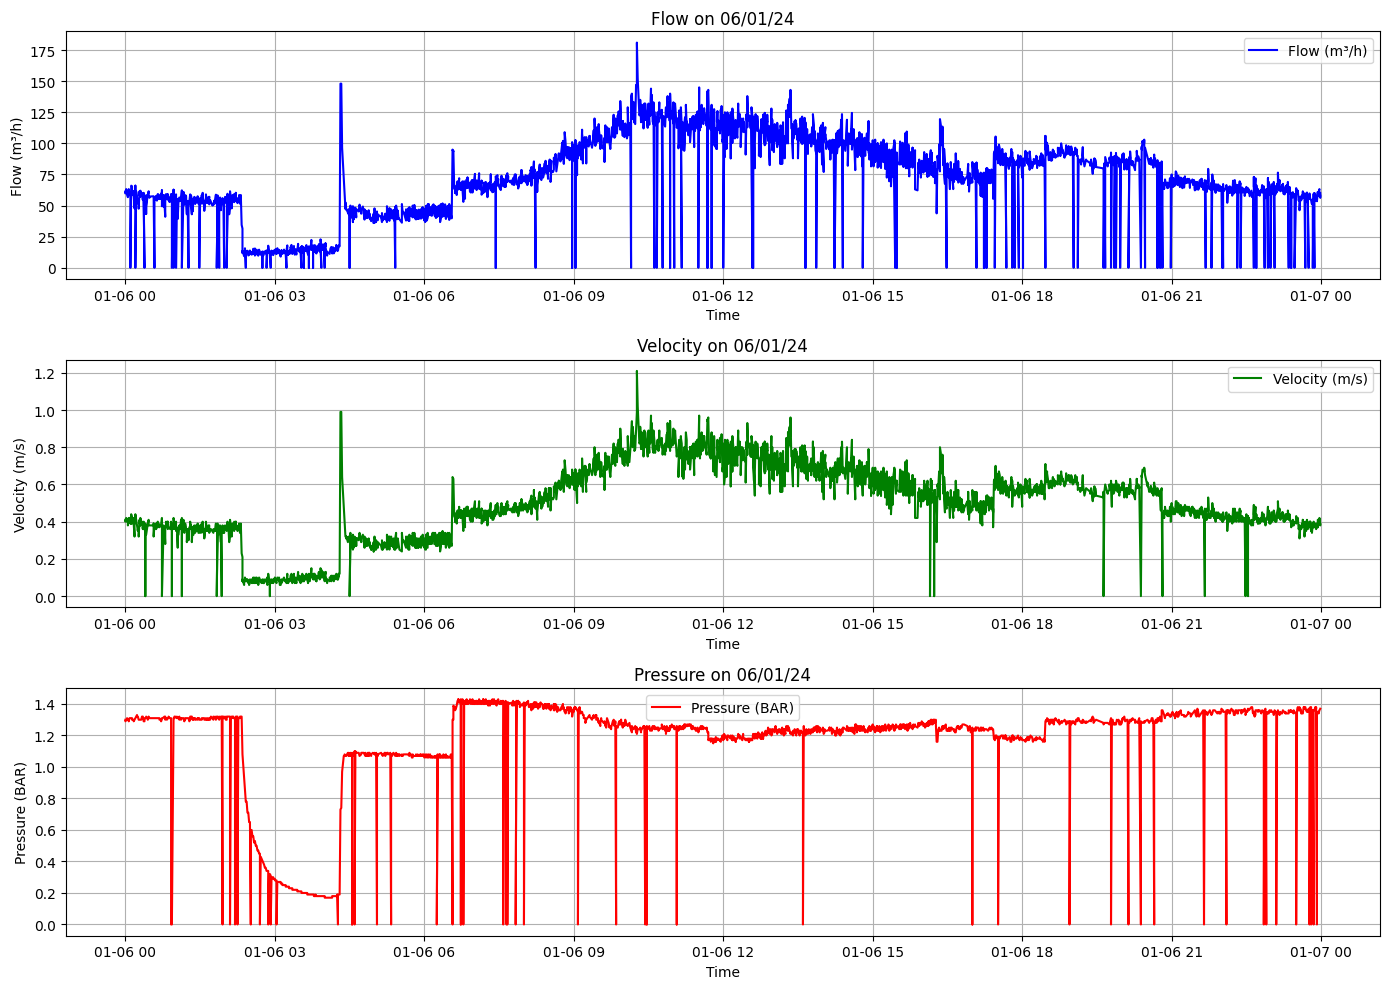

In [26]:
# Load the preprocessed data
# df = pd.read_csv('preprocessed_data_corrected.csv')

# Convert 'Date Time' to datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d/%m/%y %H:%M')

# Choose a specific date to plot
selected_date = '06/01/24'  # Change this to your desired date
df_selected_day = df[df['Date Time'].dt.strftime('%d/%m/%y') == selected_date]

# Plotting
plt.figure(figsize=(14, 10))

# Plot Flow
plt.subplot(3, 1, 1)
plt.plot(df_selected_day['Date Time'], df_selected_day['FLOW(m3/h)'], label='Flow (m³/h)', color='blue')
plt.xlabel('Time')
plt.ylabel('Flow (m³/h)')
plt.title(f'Flow on {selected_date}')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df_selected_day['Date Time'], df_selected_day['VELOCITY(m/s)'], label='Velocity (m/s)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title(f'Velocity on {selected_date}')
plt.grid(True)
plt.legend()

# Plot Pressure
plt.subplot(3, 1, 3)
plt.plot(df_selected_day['Date Time'], df_selected_day['Pressure'], label='Pressure (BAR)', color='red')
plt.xlabel('Time')
plt.ylabel('Pressure (BAR)')
plt.title(f'Pressure on {selected_date}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
# Ensure 'Date Time' is in datetime format
# df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d-%m-%Y %H:%M')

selected_date = '06/01/24'  # Change this to your desired date
selected_day = df[df['Date Time'].dt.strftime('%d/%m/%y') == selected_date]


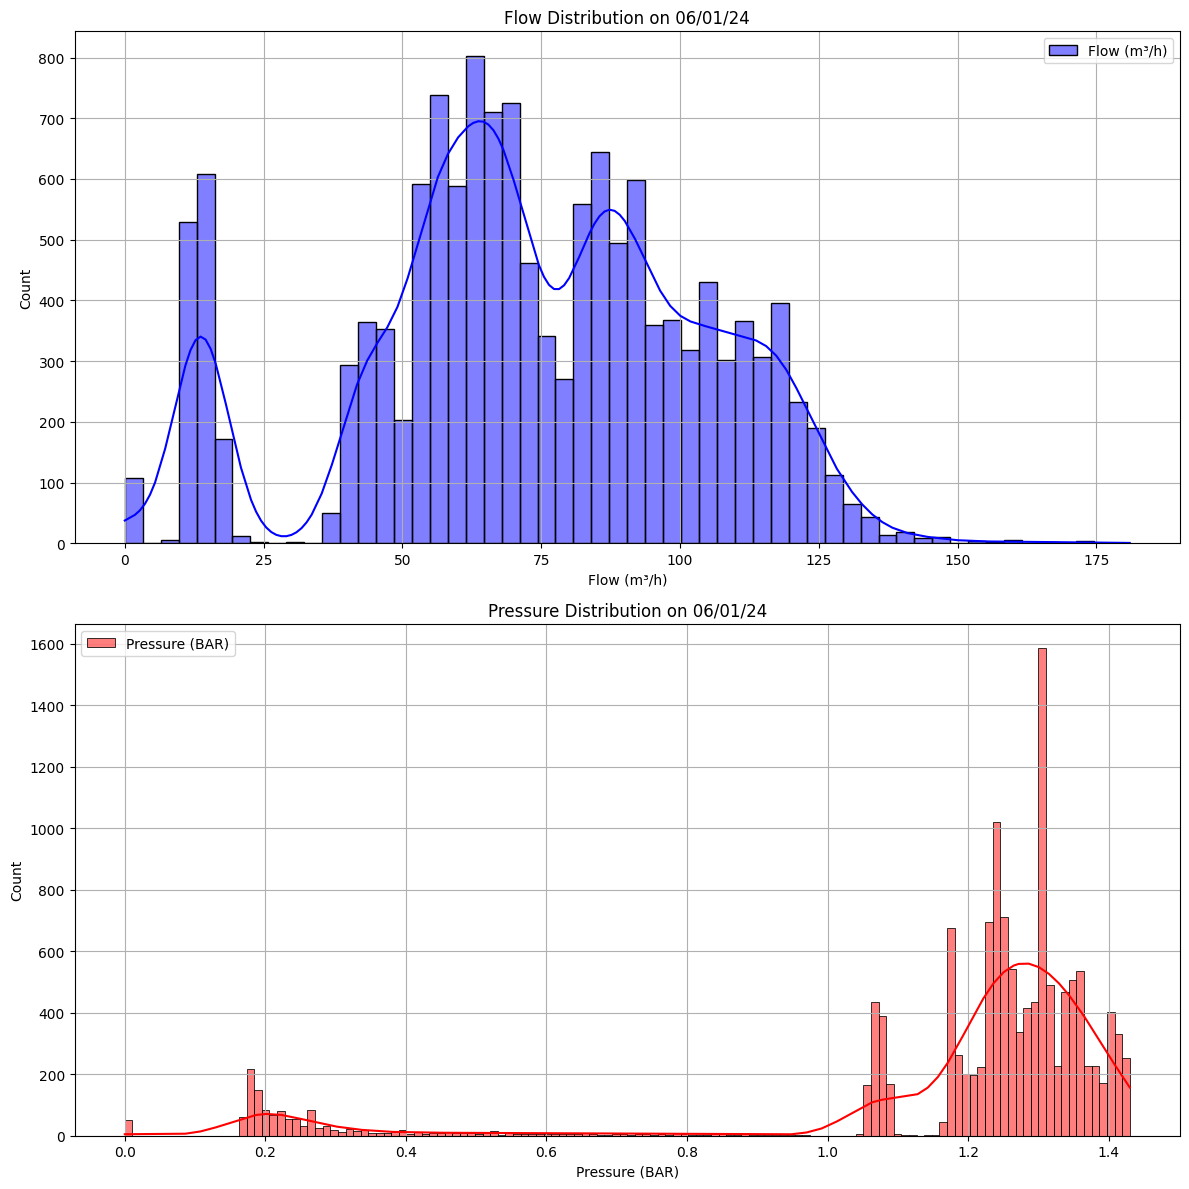

In [28]:
# Plot distribution for Flow on the selected day
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
sns.histplot(selected_day['FLOW(m3/h)'], kde=True, color='blue', label='Flow (m³/h)')
plt.title(f'Flow Distribution on {selected_date}')
plt.xlabel('Flow (m³/h)')
plt.grid(True)
plt.tight_layout()
plt.legend()


# Plot distribution for Pressure on the selected day
plt.subplot(2,1,2)
sns.histplot(selected_day['Pressure'], kde=True, color='red', label='Pressure (BAR)')
plt.title(f'Pressure Distribution on {selected_date}')
plt.xlabel('Pressure (BAR)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


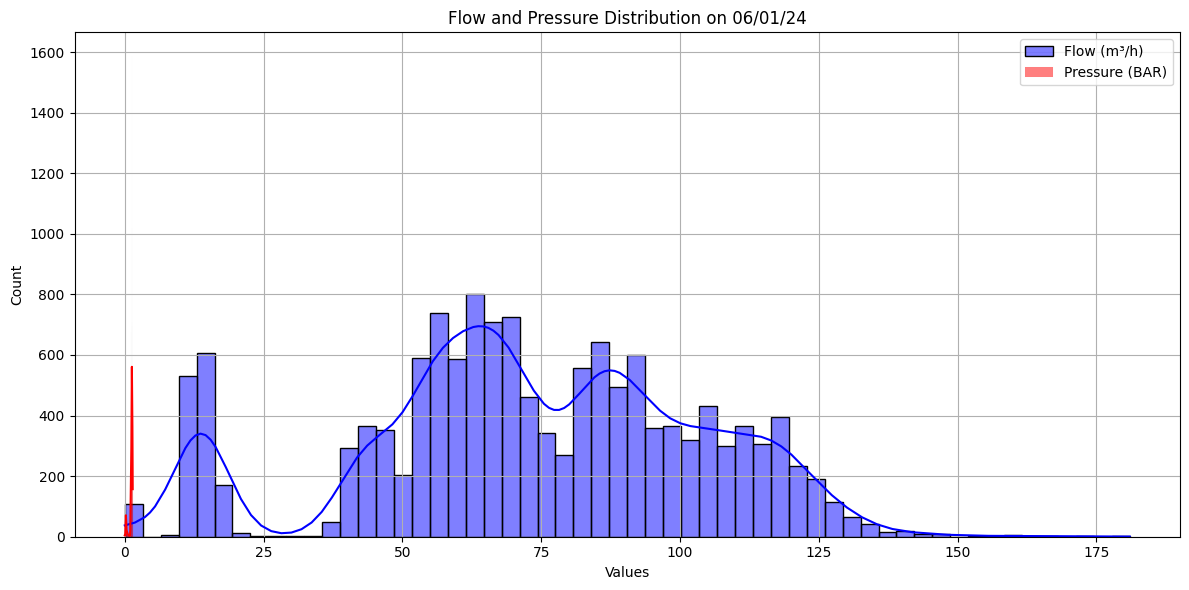

In [29]:
# Combined distribution plot for Flow and Pressure
plt.figure(figsize=(12, 6))
sns.histplot(selected_day['FLOW(m3/h)'], kde=True, color='blue', label='Flow (m³/h)')
sns.histplot(selected_day['Pressure'], kde=True, color='red', label='Pressure (BAR)')
plt.title(f'Flow and Pressure Distribution on {selected_date}')
plt.xlabel('Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Negative Pressure Values:
 Empty DataFrame
Columns: [Date Time, FLOW(m3/h), VELOCITY(m/s), Pressure, No_Water_Supply, Pressure_Drop, Flow_Change]
Index: []


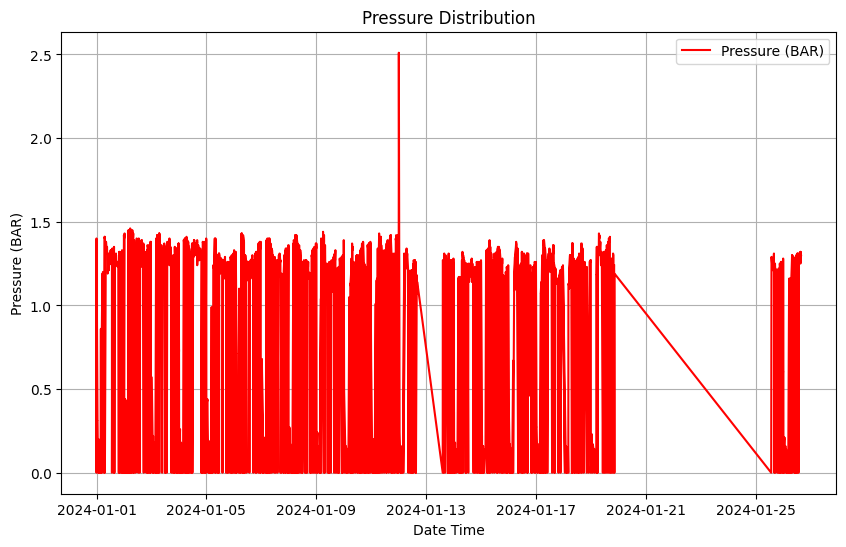

In [30]:
# Check for negative values in the pressure column
negative_pressure = df[df['Pressure'] < 0]
print("Negative Pressure Values:\n", negative_pressure)

# If you find negative values, you can either drop them or set them to NaN
df.loc[df['Pressure'] < 0, 'Pressure'] = pd.NA  # or df.drop(negative_pressure.index, inplace=True)

# Optionally, replace negative values with the mean or another imputation strategy
# df['Pressure'] = df['Pressure'].replace({pd.NA: df['Pressure'].mean()})

# If interpolating, ensure no negative values remain after interpolation
df['Pressure'].interpolate(method='linear', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(df['Date Time'], df['Pressure'], label='Pressure (BAR)', color='red')
plt.title('Pressure Distribution')
plt.xlabel('Date Time')
plt.ylabel('Pressure (BAR)')
plt.grid()
plt.legend()
plt.show()


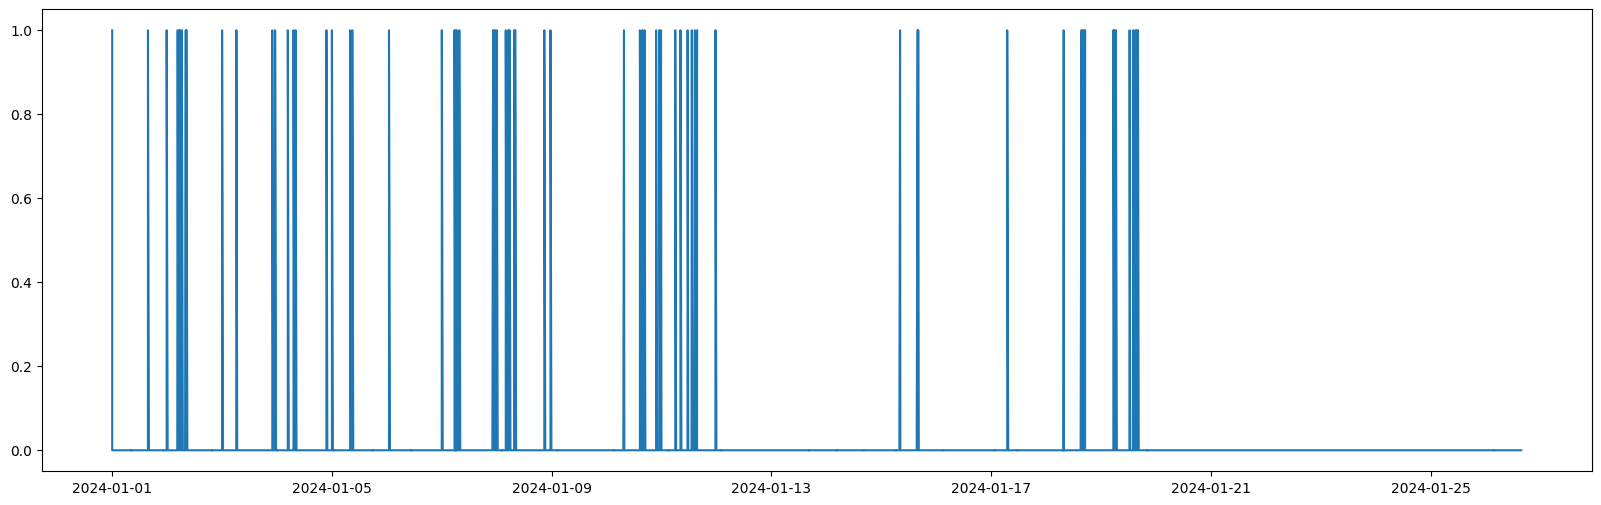

In [30]:
plt.figure(figsize=(20,6))
plt.plot(df['Date Time'], df['burst_or_leak_label'])

In [27]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d-%m-%Y %H:%M')
burst_or_leak_events = df[df['burst_or_leak_label'] == 1]
print(burst_or_leak_events[['Date Time', 'FLOW(m3/h)', 'Pressure', 'VELOCITY(m/s)']])

                 Date Time  FLOW(m3/h)  Pressure  VELOCITY(m/s)
1      2024-01-01 00:00:00         0.0       0.0            0.0
16784  2024-01-01 15:38:00         0.0       0.0            0.0
20365  2024-01-01 23:48:00         0.0       0.0            0.0
20524  2024-01-02 00:01:00         0.0       0.0            0.0
23623  2024-01-02 04:27:00         0.0       0.0            0.0
...                    ...         ...       ...            ...
213985 2024-01-19 14:05:00         0.0       0.0            0.0
214043 2024-01-19 14:54:00         0.0       0.0            0.0
214057 2024-01-19 15:05:00         0.0       0.0            0.0
214067 2024-01-19 15:34:00         0.0       0.0            0.0
214173 2024-01-19 16:09:00         0.0       0.0            0.0

[108 rows x 4 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_14020\924591664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d-%m-%Y %H:%M')
